# Santosh Phani Vishnu Aita   ,   UBID: SAITA

# Partner: Harsha Kosta, UBID: HARSHAKO

# Lab1 Part2

## Graph 1 : Influenza national summary (Green and Yellow)

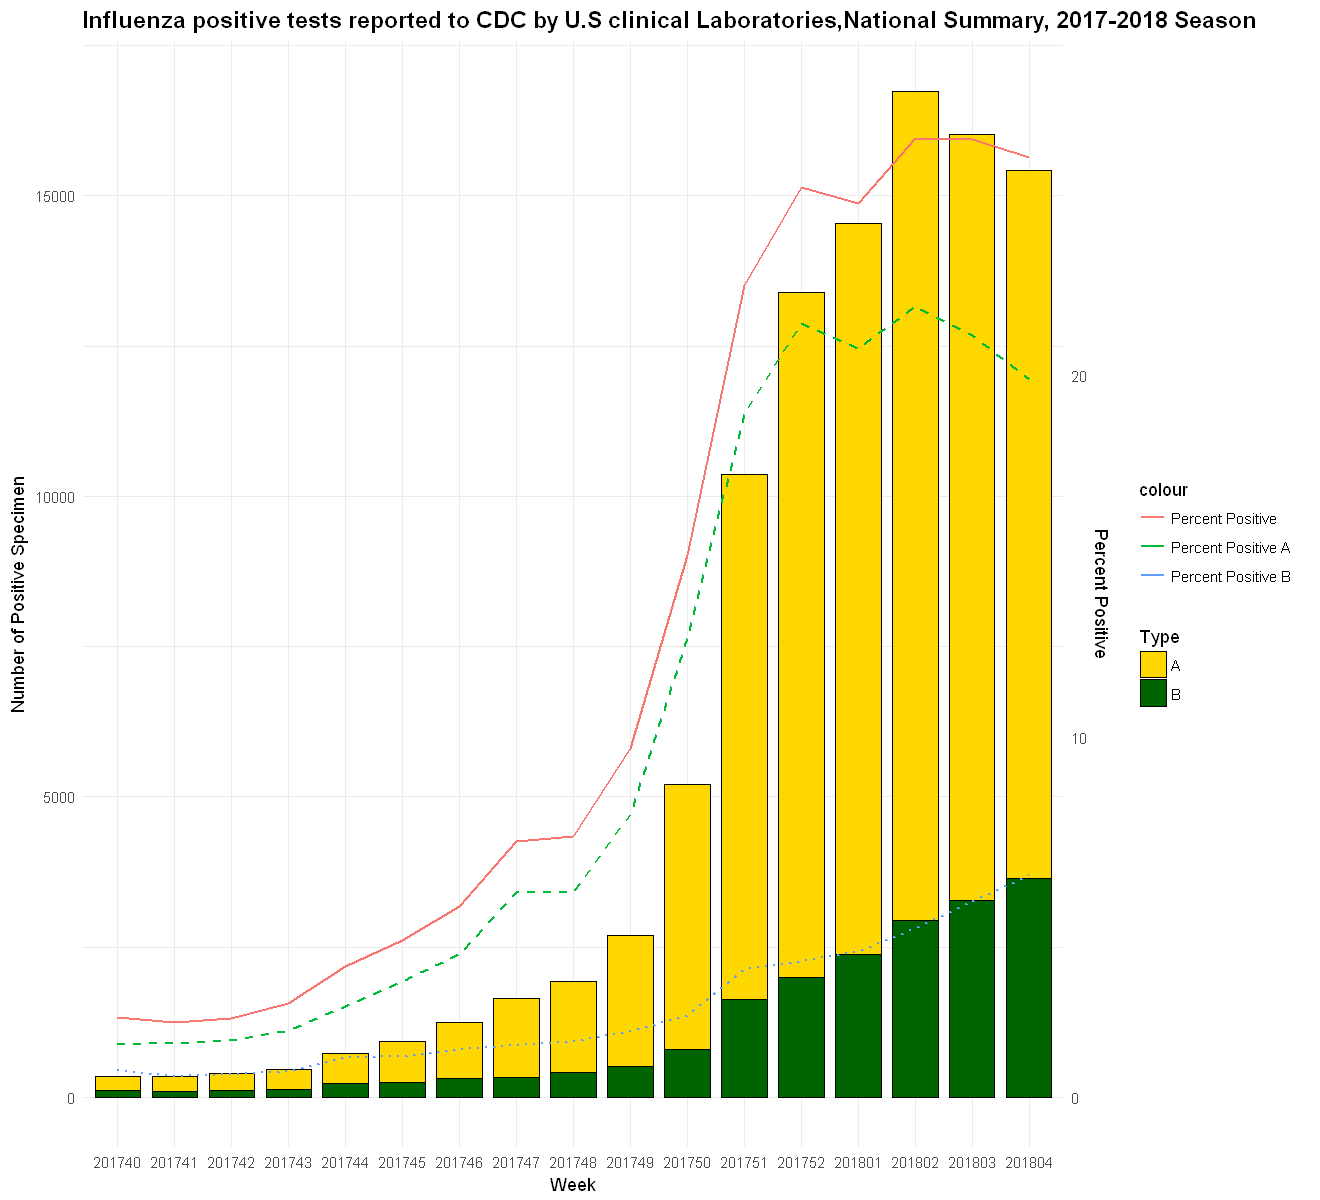

In [40]:
library("ggplot2")

#tables <- read.csv(file.choose(), header = T)
tables <- read.csv("graph_1.csv", header=T)

## Creating Data Frames and Manipulating data 
df<-subset(tables,select=c('Week','Total.A','Total.B', 'Percent.Positive', 'Percent.Positive.A', 'Percent.Positive.B'))
dfA<-subset(tables, select=c('Week', 'Total.A', 'Percent.Positive', 'Percent.Positive.A', 'Percent.Positive.B'))
colnames(dfA) <- c("Week", "Total","PercentPositive","PercentPositiveA","PercentPositiveB")
dfA$Type <- rep("A",nrow(dfA))
dfB<-subset(tables, select=c('Week', 'Total.B', 'Percent.Positive', 'Percent.Positive.A', 'Percent.Positive.B'))
colnames(dfB) <- c("Week", "Total","PercentPositive","PercentPositiveA","PercentPositiveB")
dfB$Type <- rep("B",nrow(dfA))
df <- rbind(dfA, dfB)
df$Week<-factor(factor(as.factor(df$Week)))

## Plotting the bar and line graph over one another
options(repr.plot.width=11, repr.plot.height=10,position = position_nudge(x=0.5))
ggplot(data=df,aes(x=Week))+geom_bar(aes(y=Total,fill=Type),position="stack",stat="Identity",width=0.8, colour="black")+
geom_line(aes(y=PercentPositive*600,group=1,colour="Percent Positive"),size=0.8)+
scale_y_continuous(sec.axis=sec_axis(~./600,name="Percent Positive"))+
geom_line(aes(y=PercentPositiveA*600,group=1,colour="Percent Positive A"),linetype="dashed",size=0.8)+
geom_line(aes(y=PercentPositiveB*600,group=1,colour="Percent Positive B"),linetype="dotted",size=0.8)+
xlab("Week")+ylab("Number of Positive Specimen") + theme_minimal()+
scale_fill_manual(values=c('gold','darkgreen'))+
ggtitle("Influenza positive tests reported to CDC by U.S clinical Laboratories,National Summary, 2017-2018 Season")+
theme(plot.title = element_text(size = 14, face = "bold"))

## Graph 2 : Flu heat map of USA (Required)

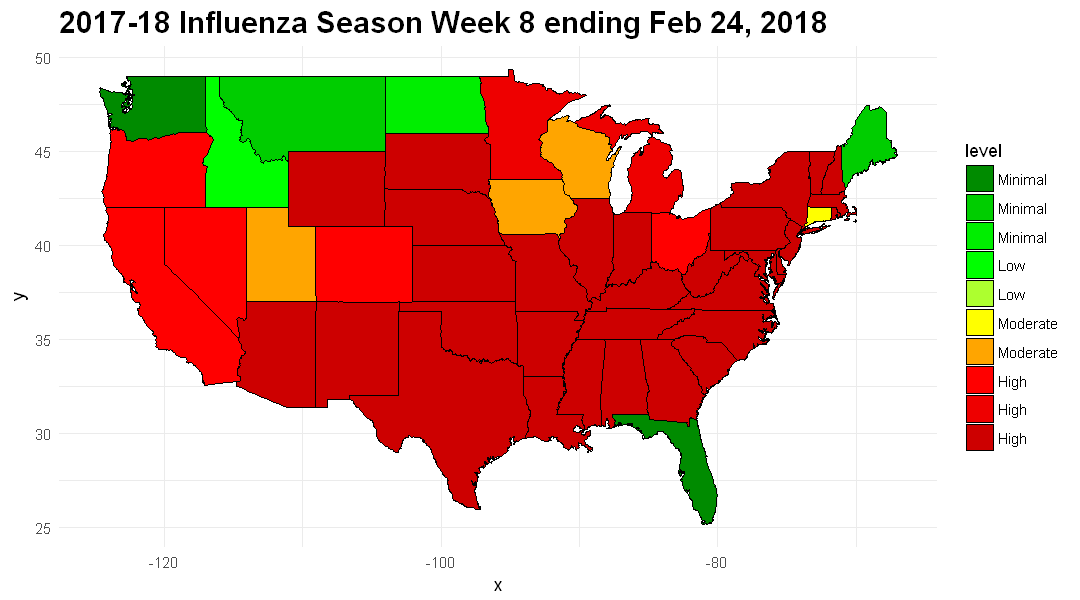

In [17]:
library(reshape2)
library("ggmap")
library("maptools")
library(maps)
library(ggplot2)
library(sp)

#tables<-read.csv(file.choose(), header=T)
tables <- read.csv("map.csv", header=T)
table1 = data.frame(region=tolower(tables$STATENAME), 
    level=tables$ACTIVITY.LEVEL, 
    stringsAsFactors=F)


table1[,2] <- substring(table1[,2],6,8)

table1$level <- (as.numeric(table1$level)+11)
table1$level <- (as.character(table1$level))
#typeof(x$level)
#x
options(repr.plot.width=9, repr.plot.height=5)
states_map <- map_data("state")
ggplot(data=table1, aes(map_id = region)) + 
    geom_map(aes(fill = level), map = states_map,colour='black')+
scale_fill_manual(values = c("green4", "green3", "green2","green", "greenyellow","yellow", "orange","red1", "red2", "red3"),labels = c("Minimal", "Minimal", "Minimal","Low", "Low", "Moderate","Moderate", "High","High", "High"))+
 theme_minimal()+
    expand_limits(x = states_map$long, y = states_map$lat)+

ggtitle("2017-18 Influenza Season Week 8 ending Feb 24, 2018")+
theme(plot.title = element_text(size = 18, face = "bold"))

## Graph 3 : Positive Tested (By Week)

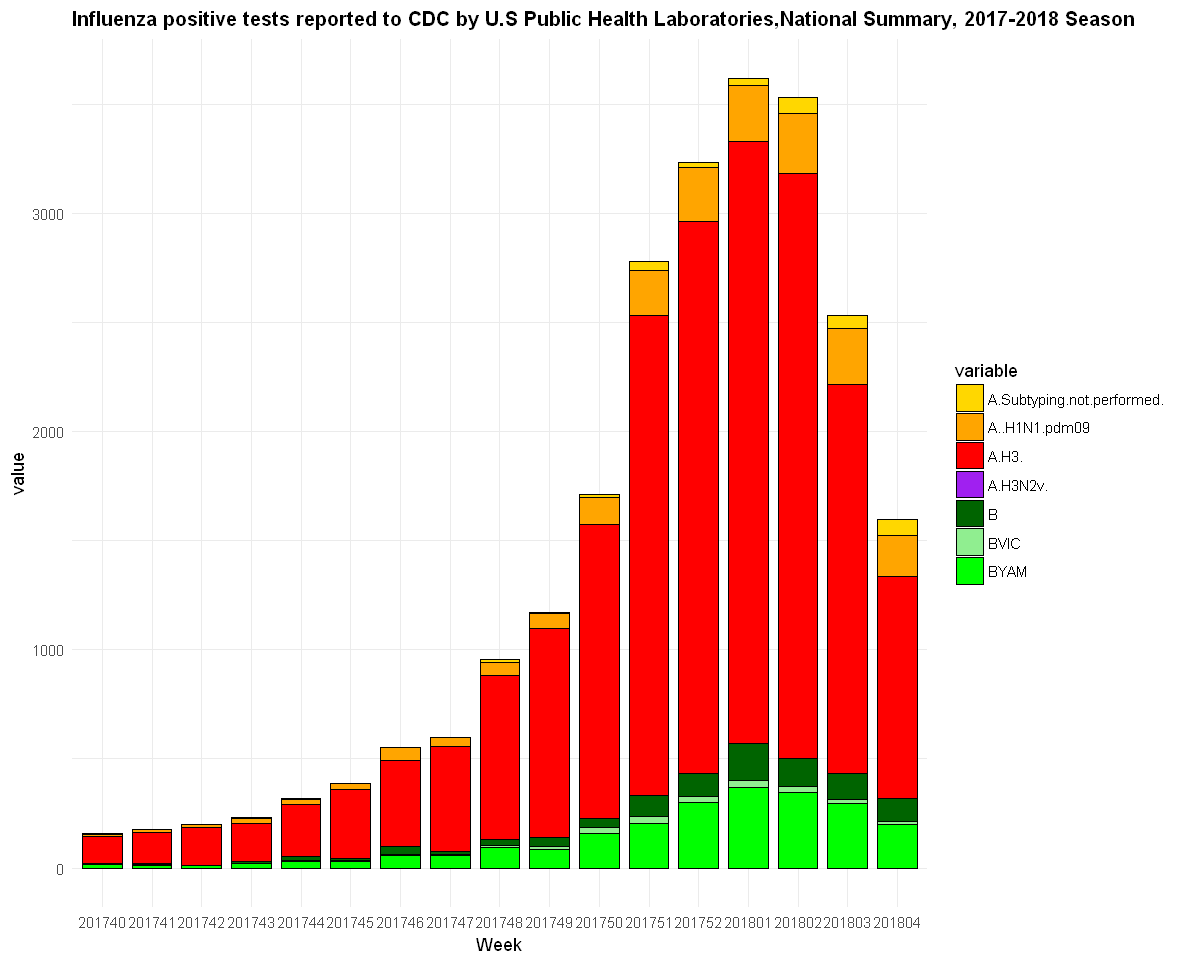

In [53]:
## Please select the file "graph_3.csv" for data.
#install.packages("reshape2")
library(reshape2)
library(ggplot2)
#tables <- read.csv(file.choose(), header = T)
tables <- read.csv("graph_3.csv", header=T)
#names(tables)
meltDF <- melt(tables[,c('Week','A.Subtyping.not.performed.','A..H1N1.pdm09','A.H3.', 'A.H3N2v.', 'B', 'BVIC','BYAM')],id.vars = 1)
meltDF$Week<-factor(factor(as.factor(meltDF$Week)))
#meltDF

options(repr.plot.width=10, repr.plot.height=8)

g<-ggplot(data=meltDF,aes(x=Week))+
geom_bar(aes(y=value,fill=variable),position="stack",stat="Identity",width=0.8, colour="black")+
theme_minimal()+
scale_fill_manual(values=c('gold','orange','red','purple','darkgreen','lightgreen','green'))

g+ggtitle("Influenza positive tests reported to CDC by U.S Public Health Laboratories,National Summary, 2017-2018 Season")+
theme(plot.title = element_text(size = 12, face = "bold"))

## Graph 4 : Pediatric deaths

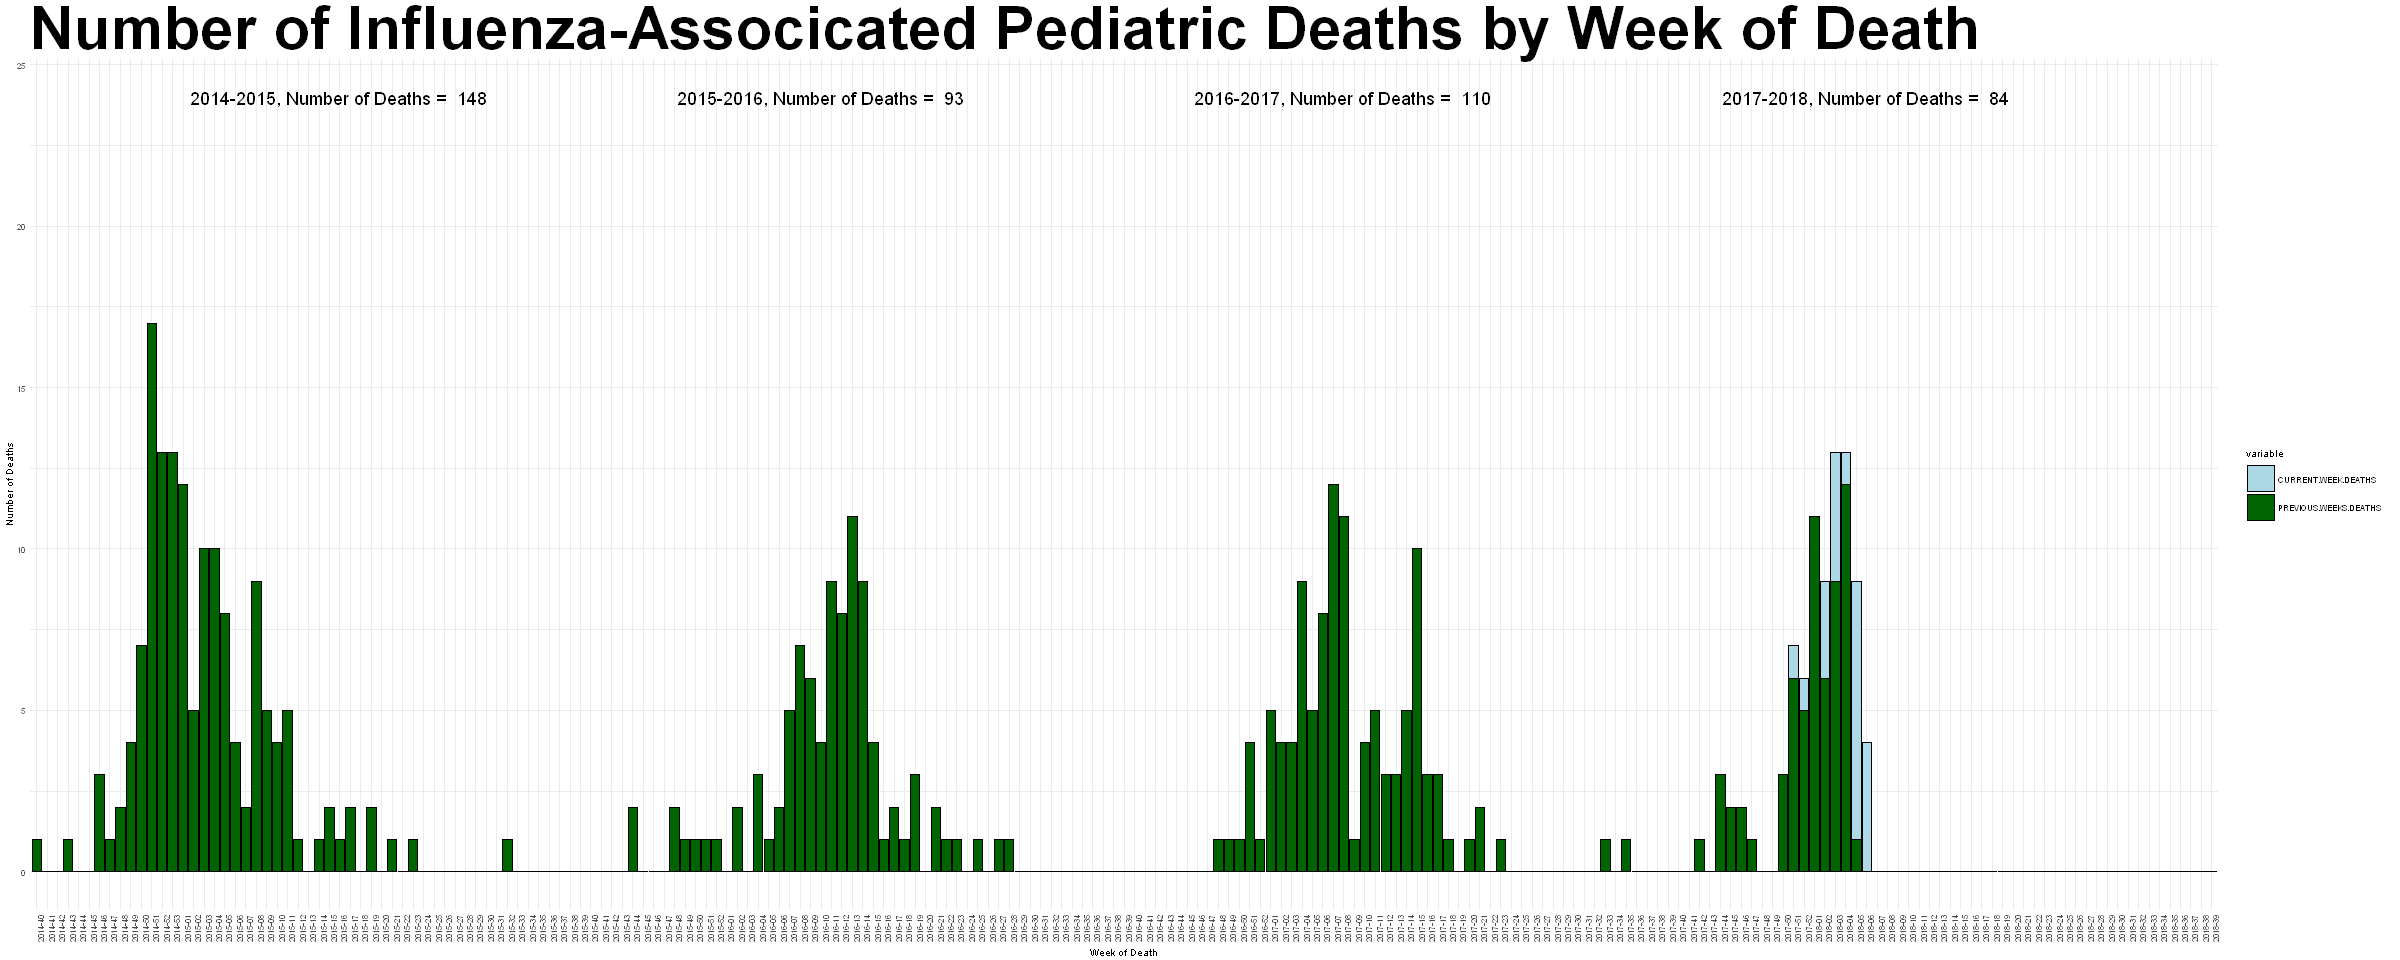

In [207]:
library(reshape2)
library(ggplot2)

#table1 <- read.csv(file.choose(), header = T)
table1 <- read.csv("pda1.csv", header=T)
#names(table1)
#tables
meltDF <- melt(table1[,c('WEEK.NUMBER','CURRENT.WEEK.DEATHS','PREVIOUS.WEEKS.DEATHS')],id.vars =1 )
#meltDF <- melt(tables[,c('Week','A.H3N2v.','A..H1N1.pdm09','A.H3.', 'A.Subtyping.not.performed.', 'B', 'BVIC',"BYAM")],id.vars = 1)
#meltDF

d<-aggregate(cbind(table1$'PREVIOUS.WEEKS.DEATHS', table1$'CURRENT.WEEK.DEATHS') ~ table1$'SEASON', data=table1, FUN=sum)
x<-rowSums(d[,c("V1", "V2")])


options(repr.plot.width=20, repr.plot.height=8)
ggplot(data=meltDF,aes(x=WEEK.NUMBER))+
geom_bar(aes(y=value,fill=variable),stat="Identity",width=0.9, colour="black",position = "stack")+
theme_minimal(base_size=6)+
theme(axis.text.x = element_text(angle = 90))+scale_fill_manual(values=c('lightblue','darkgreen'))+xlab('Week of Death')+
ylab('Number of Deaths')+
annotate("text", x=30, y=24, label= paste("2014-2015, Number of Deaths = ", x[1])) + 
  annotate("text", x = 76, y=24, label = paste("2015-2016, Number of Deaths = ", x[2]))+
     annotate("text", x = 126, y=24, label = paste("2016-2017, Number of Deaths = ", x[3]))+
         annotate("text", x = 176, y=24, label = paste("2017-2018, Number of Deaths = ", x[4]))+
ggtitle('Number of Influenza-Associcated Pediatric Deaths by Week of Death')+

theme(plot.title = element_text(size = 36, face = "bold"))


# Graph 5: 

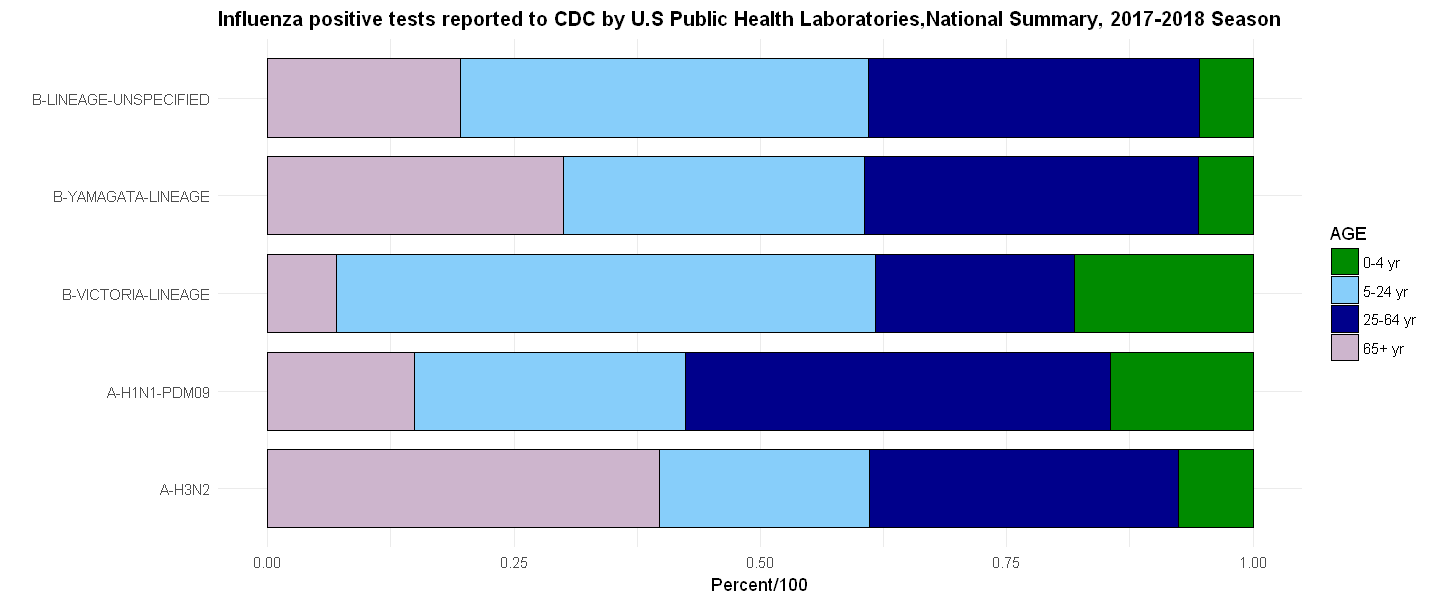

In [75]:
library("ggplot2")
library("reshape2")
tables <- read.csv("hori.csv", header=T)


colnames(tables) <- c("SEASON", "AGE","A-H1","A-UNABLE-TO-SUBTYPE","A-H3N2","A-H1N1-PDM09","A-SUBSTRING-NOT-PERFORMED","B-VICTORIA-LINEAGE",
                  "B-YAMAGATA-LINEAGE","B-LINEAGE-UNSPECIFIED","H3N2V")
dfB<-subset(tables, select=c("AGE","A-H1","A-UNABLE-TO-SUBTYPE","A-H3N2","A-H1N1-PDM09","A-SUBSTRING-NOT-PERFORMED","B-VICTORIA-LINEAGE",
                  "B-YAMAGATA-LINEAGE","B-LINEAGE-UNSPECIFIED","H3N2V"))

meltDF <- melt(dfB[,c( "AGE","A-H3N2","A-H1N1-PDM09","B-VICTORIA-LINEAGE",
                  "B-YAMAGATA-LINEAGE","B-LINEAGE-UNSPECIFIED")],id.vars = 1)
meltDF$value <- as.numeric(meltDF$value)
#meltDF$Week<-factor(factor(as.factor(meltDF$Week)))   
#meltDF
options(repr.plot.width=12, repr.plot.height=5)
#sums<-sum(meltDF$value)
ggplot(data=meltDF,aes(x=variable))+
geom_bar(aes(y=(value /100),fill=AGE),position="fill",stat="Identity",width=0.8, colour="black")+
#geom_text(aes(y=value,label=value), vjust=0) +
theme_minimal()+
scale_fill_manual(values=c('0-4 yr'='green4', '5-24 yr' = 'lightskyblue', '25-64 yr'='blue4','65+ yr'='thistle3'),
                  breaks=c('0-4 yr', '5-24 yr', '25-64 yr','65+ yr'))+

ggtitle("Influenza positive tests reported to CDC by U.S Public Health Laboratories,National Summary, 2017-2018 Season")+
xlab("")+
ylab("Percent/100")+
#+ scale_y_continuous(labels = percent)+
theme(plot.title = element_text(size = 12, face = "bold"))+coord_flip()

## Graph 6 : Mortality

### Note: The plot is very accurate, with little gaps due to paneling.

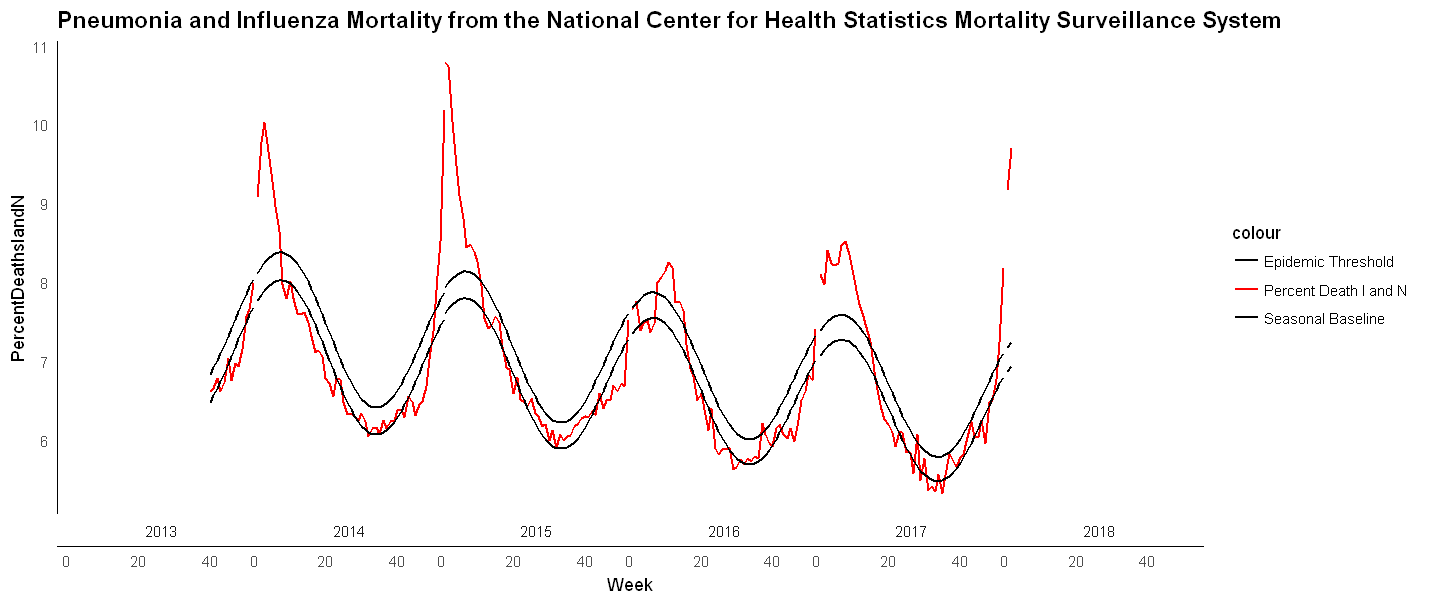

In [13]:
library("reshape2")
library("ggplot2")
#tables<-read.csv(file.choose())
tables <- read.csv("graph_5.csv", header=T)
colnames(tables) <- c("Year", "Week","PercentDeathsIandN","Expected","Threshold","AllDeaths","PneumoniaDeaths","InfluenzaDeaths")
#names(tables)
df<-subset(tables,select=c('Year','Week','PercentDeathsIandN', 'Expected', 'Threshold'))
#df$YearWeek=paste(df$Year,df$Week,sep=" ")
#meltDF <- melt(df[,c('YearWeek','PercentDeathsIandN','Expected','Threshold')],id.vars = "YearWeek")
#meltDF

options(repr.plot.width=12, repr.plot.height=5)

ggplot(df,aes(x=Week))+
geom_line(aes(y=PercentDeathsIandN,group=1,colour="Percent Death I and N"),size=0.8)+
geom_line(aes(y=Expected,group=1,colour="Seasonal Baseline"),size=0.8)+  
#geom_line(data=df[!is.na(df$Expected),],aes(y=Expected,group=1,colour="Seasonal Baseline"))+
geom_line(aes(y=Threshold,group=1,colour="Epidemic Threshold"),size=0.8)+  scale_colour_manual(values=c("black","red","black"))+
facet_wrap(~Year, nrow = 1,strip.position="bottom")+theme_minimal() + theme(panel.spacing = unit(-0.9, "lines"))+ xlim(0,53)+
ggtitle("Pneumonia and Influenza Mortality from the National Center for Health Statistics Mortality Surveillance System")+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
theme(plot.title = element_text(size = 14, face = "bold"))